## stemming

Tools - NLTK

In [ ]:
import nltk
import spacy

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [ ]:
words = ["eating", "eats", "eat", "ate", "adjustable", "rafting", "ability", "meeting"]

for word in words:
  print(word, "|", stemmer.stem(word))

eating | eat
eats | eat
eat | eat
ate | ate
adjustable | adjust
rafting | raft
ability | abil
meeting | meet


## lemmatization

Tools - Spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

doc =nlp("Eating eats eat ate adjustable rafting ability wearing better")

for token in doc:
  print(token.text, "|", token.lemma_)

Eating | eat
eats | eat
eat | eat
ate | eat
adjustable | adjustable
rafting | raft
ability | ability
wearing | wear
better | well


In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
ar = nlp.get_pipe('attribute_ruler')
ar.add([[{"TEXT": "Bro"}],[{"TEXT": "Brah"}]], {"LEMMA" : "Brother"})
doc= nlp("Bro , hi Brah , wassup")
for token in doc:
  print(token.text, "|", token.lemma_)

Bro | Brother
, | ,
hi | hi
Brah | Brother
, | ,
wassup | wassup


## Part OF Speech - POS

In [ ]:
doc= nlp("A person flew to mars yesterday. He carried biryani masala with him")
for token in doc:
  print(token, "|", token.pos_, "|", spacy.explain(token.pos_), "|", token.tag_, "|", spacy.explain(token.tag_) )

A | DET | determiner | DT | determiner
person | NOUN | noun | NN | noun, singular or mass
flew | VERB | verb | VBD | verb, past tense
to | ADP | adposition | IN | conjunction, subordinating or preposition
mars | NOUN | noun | NNS | noun, plural
yesterday | NOUN | noun | NN | noun, singular or mass
. | PUNCT | punctuation | . | punctuation mark, sentence closer
He | PRON | pronoun | PRP | pronoun, personal
carried | VERB | verb | VBD | verb, past tense
biryani | ADJ | adjective | JJ | adjective (English), other noun-modifier (Chinese)
masala | NOUN | noun | NN | noun, singular or mass
with | ADP | adposition | IN | conjunction, subordinating or preposition
him | PRON | pronoun | PRP | pronoun, personal


In [ ]:
count = doc.count_by(spacy.attrs.POS)
count

{90: 1, 92: 4, 100: 2, 85: 2, 97: 1, 95: 2, 84: 1}

In [ ]:
for k in count.keys():
  print(doc.vocab[k].text, "|", count[k])

DET | 1
NOUN | 4
VERB | 2
ADP | 2
PUNCT | 1
PRON | 2
ADJ | 1


## Named Entity Recognition - NER

In [ ]:
doc= nlp("Damn! Tesla Inc is going to acquire Twitter for $45 billion which is crazy!")
for ent in doc.ents:
  print(ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))

Tesla Inc | ORG | Companies, agencies, institutions, etc.
Twitter | PRODUCT | Objects, vehicles, foods, etc. (not services)
$45 billion | MONEY | Monetary values, including unit


In [ ]:
doc= nlp("Tesla is going to acquire twitter for $45 billion")
for ent in doc.ents:
  print(ent, "|", ent.label_, "|", spacy.explain(ent.label_))

Tesla | ORG | Companies, agencies, institutions, etc.
$45 billion | MONEY | Monetary values, including unit


In [ ]:
from spacy.tokens import Span

s1= Span(doc, 0, 1, label="ORG")
s2= Span(doc, 5, 6, label="ORG")

doc.set_ents([s1, s2], default="unmodified")

for ent in doc.ents:
  print(ent, "|", ent.label_, "|", spacy.explain(ent.label_))

Tesla | ORG | Companies, agencies, institutions, etc.
twitter | ORG | Companies, agencies, institutions, etc.
$45 billion | MONEY | Monetary values, including unit


## Spam classification using bag of words

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df =pd.read_csv("/content/spam.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [ ]:
df['spam'] = df.Category.apply(lambda x: 1 if x=='spam' else 0)

In [ ]:
df.head(3)

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_cv = v.fit_transform(X_train)

In [ ]:
x_train_np= x_train_cv.toarray()

In [ ]:
x_train_np.shape

(4457, 7801)

In [ ]:
v.get_feature_names_out()[0:100]

array(['00', '000', '000pes', '008704050406', '0089', '0121',
       '01223585236', '01223585334', '0125698789', '02', '0207',
       '02072069400', '02073162414', '02085076972', '021', '03', '04',
       '0430', '05', '0578', '06', '07', '07008009200', '07046744435',
       '07090201529', '07090298926', '07099833605', '07123456789',
       '0721072', '07734396839', '07742676969', '07753741225',
       '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078',
       '07801543489', '07808247860', '07808726822', '07815296484',
       '07821230901', '078498', '07880867867', '0789xxxxxxx',
       '07946746291', '07973788240', '07xxxxxxxxx', '08', '0800',
       '08000407165', '08000776320', '08000839402', '08000930705',
       '08000938767', '08001950382', '08002888812', '08002986030',
       '08002986906', '08006344447', '0808', '08081263000', '08081560665',
       '0825', '083', '0844', '08448350055', '08448714184', '0845',
       '08450542832', '08452810073', '08452810075over18', '0

In [ ]:
v.vocabulary_

{'hi': 3469,
 'can': 1655,
 'please': 5313,
 'get': 3170,
 'lt': 4305,
 'gt': 3305,
 'dollar': 2436,
 'loan': 4221,
 'from': 3067,
 'you': 7762,
 'll': 4215,
 'pay': 5181,
 'back': 1224,
 'by': 1618,
 'mid': 4523,
 'february': 2841,
 'pls': 5320,
 'ok': 4979,
 'wont': 7637,
 'call': 1632,
 'or': 5036,
 'disturb': 2392,
 'any': 1022,
 'one': 5003,
 'know': 4014,
 'all': 940,
 'are': 1076,
 'avoiding': 1192,
 'me': 4460,
 'am': 962,
 'burden': 1587,
 'for': 2984,
 'oh': 4974,
 'gei': 3153,
 'that': 6872,
 'happend': 3371,
 'to': 6991,
 'in': 3685,
 'tron': 7100,
 'maybe': 4454,
 'ill': 3655,
 'dl': 2402,
 'it': 3805,
 '3d': 480,
 'when': 7534,
 'its': 3813,
 'out': 5070,
 'sorry': 6386,
 'later': 4083,
 'guy': 3323,
 'who': 7550,
 'gets': 3172,
 'used': 7276,
 'but': 1602,
 'is': 3793,
 'too': 7029,
 'dumb': 2522,
 'realize': 5669,
 'anyway': 1034,
 'holla': 3514,
 'at': 1145,
 'whenever': 7535,
 're': 5651,
 'around': 1097,
 'because': 1310,
 'need': 4786,
 'an': 984,
 'excuse': 2740,
 

In [ ]:
np.where(x_train_np[0]!=0)

(array([1224, 1618, 1655, 2436, 2841, 3067, 3170, 3305, 3469, 4215, 4221,
        4305, 4523, 5181, 5313, 5320, 7762]),)

In [ ]:
v.get_feature_names_out()[1655]

'can'

In [ ]:
X_train[2649]

'Hi, can i please get a  &lt;#&gt;  dollar loan from you. I.ll pay you back by mid february. Pls.'

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train_cv, y_train)

MultinomialNB()

In [ ]:
x_test_cv = v.transform(X_test)

model.predict(x_test_cv)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_test, model.predict(x_test_cv))

0.9865470852017937

In [ ]:
print(classification_report(y_test, model.predict(x_test_cv)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       976
           1       0.96      0.94      0.95       139

    accuracy                           0.99      1115
   macro avg       0.97      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [ ]:
pipe.fit(X_train, y_train)
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       976
           1       0.96      0.94      0.95       139

    accuracy                           0.99      1115
   macro avg       0.97      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



## Stop Words

In [3]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
len(STOP_WORDS)

326

In [8]:
from tkinter.constants import S
nlp = spacy.load("en_core_web_sm")
doc = nlp("We just opened our wings, the flying part is coming soon")

stop=[]
no_stop= []
for token in doc:
  if token.is_stop:
    stop.append(token.text)
  else:
    no_stop.append(token.text)
print(stop)
print(no_stop)

['We', 'just', 'our', 'the', 'part', 'is']
['opened', 'wings', ',', 'flying', 'coming', 'soon']


In [24]:
def preprocess(text):
  doc=nlp(text)
  no_stop_words= [token.text for token in doc if not token.is_stop and not token.is_punct]
  return " ".join(no_stop_words)

In [9]:
import pandas as pd

In [15]:
df= pd.read_json('https://raw.githubusercontent.com/codebasics/nlp-tutorials/main/10_stop_words/doj_press.json', lines=True)
df.head()

,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division]
3,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08T00:00:00-05:00,[],[Environment and Natural Resources Division]
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]


In [17]:
df= df[df['topics'].str.len() != 0]
df.head()

,id,title,contents,date,topics,components
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]
7,14-1412,14 Indicted in Connection with New England Com...,A 131-count criminal indictment was unsealed t...,2014-12-17T00:00:00-05:00,[Consumer Protection],[Civil Division]
19,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,The United States Attorney’s Office for the Mi...,2017-12-14T00:00:00-05:00,[Environment],"[Environment and Natural Resources Division, U..."
22,15-1562,21st Century Oncology to Pay $19.75 Million to...,"21st Century Oncology LLC, has agreed to pay $...",2015-12-18T00:00:00-05:00,"[False Claims Act, Health Care Fraud]",[Civil Division]
23,17-1404,21st Century Oncology to Pay $26 Million to Se...,21st Century Oncology Inc. and certain of its ...,2017-12-12T00:00:00-05:00,"[Health Care Fraud, False Claims Act]","[Civil Division, USAO - Florida, Middle]"


In [25]:
df= df.head(100)
df["contents_new"]= df["contents"].apply(preprocess)
df.head(4)

,id,title,contents,date,topics,components,contents_new
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division],U.S. Department Justice U.S. Environmental Pro...
7,14-1412,14 Indicted in Connection with New England Com...,A 131-count criminal indictment was unsealed t...,2014-12-17T00:00:00-05:00,[Consumer Protection],[Civil Division],131 count criminal indictment unsealed today B...
19,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,The United States Attorney’s Office for the Mi...,2017-12-14T00:00:00-05:00,[Environment],"[Environment and Natural Resources Division, U...",United States Attorney Office Middle District ...
22,15-1562,21st Century Oncology to Pay $19.75 Million to...,"21st Century Oncology LLC, has agreed to pay $...",2015-12-18T00:00:00-05:00,"[False Claims Act, Health Care Fraud]",[Civil Division],21st Century Oncology LLC agreed pay $ 19.75 m...


## n-gram and bag of words

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [27]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

In [28]:
v = CountVectorizer(ngram_range=(1,3))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [29]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [30]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [31]:
preprocess("Thor ate pizza")

'thor eat pizza'

In [32]:
preprocess("Loki is eating pizza")

'Loki eat pizza'

In [33]:
corpus_processed = [
    preprocess(text) for text in corpus
]
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [34]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [35]:
v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [40]:
import pandas as pd

df = pd.read_json('https://raw.githubusercontent.com/codebasics/nlp-tutorials/main/11_bag_of_n_grams/news_dataset.json')
print(df.shape)

df.head(4)

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS


In [42]:
min_samples = 1381 # we have these many SCIENCE articles and SCIENCE is our minority class


df_business = df[df.category=="BUSINESS"].sample(min_samples, random_state=2022)
df_sports = df[df.category=="SPORTS"].sample(min_samples, random_state=2022)
df_crime = df[df.category=="CRIME"].sample(min_samples, random_state=2022)
df_science = df[df.category=="SCIENCE"].sample(min_samples, random_state=2022)

df_balanced = pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced.category.value_counts()

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

In [43]:
target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

df_balanced['category_num'] = df_balanced['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1,
    'CRIME': 2,
    'SCIENCE': 3
})

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text,
    df_balanced.category_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.category_num
)

In [45]:
y_train.value_counts()

category_num
3    1105
2    1105
0    1105
1    1104
Name: count, dtype: int64

1gram

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



1gram + 2gram

In [47]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       276
           1       0.95      0.74      0.83       277
           2       0.82      0.88      0.85       276
           3       0.92      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



1gram + 2gram + 3gram

In [48]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       276
           1       0.96      0.73      0.83       277
           2       0.83      0.87      0.85       276
           3       0.93      0.76      0.83       276

    accuracy                           0.82      1105
   macro avg       0.84      0.82      0.82      1105
weighted avg       0.84      0.82      0.82      1105



apply preprocess and compare results

In [49]:
df_balanced['preprocessed_txt'] = df_balanced['text'].apply(preprocess)

In [53]:
df_balanced.head()

,text,category,category_num,preprocessed_txt
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,GCC Business Leaders remain Confident Face Reg...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment ceo FreshBooks Talks give build...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,Leverage intuition decision making feel safe r...


In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced['preprocessed_txt'],
    df_balanced['category_num'],
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.category_num
)

In [56]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       276
           1       0.92      0.82      0.87       277
           2       0.83      0.92      0.87       276
           3       0.90      0.81      0.85       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



Text(95.72222222222221, 0.5, 'Truth')

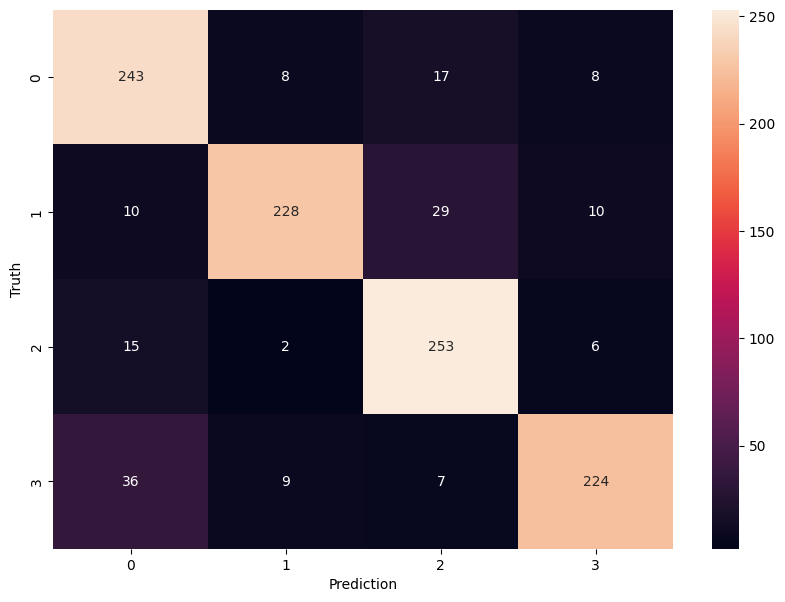

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')